**EC 414 - Spring 2019**

**HW 4 - QDA/LDA & Logistic Regression 1**

Due:  Wednesday Feb 27 (In class)

**1) Obtaining QDA & LDA Decision Rules: **

In this problem, we will consider Quadratic and Linear Discriminant Analysis for $m$ classes where $y \in \{1,...,m \}$ represents a class index. In class, we looked at the simple 2-class LDA. Using the MPE (Most Probable Explanation) rule: 

$h_{MPE} (\boldsymbol{x})= \text{argmax}_{y} p(y|\boldsymbol{x},\theta)$, 

obtain the QDA & LDA decision rules: 

$h_{QDA} (\boldsymbol{x}) = \text{argmin}_y [\frac{1}{2} (\boldsymbol{x}-\boldsymbol{\mu}_y)^T \Sigma_y^{-1} (\boldsymbol{x}-\boldsymbol{\mu}_y) + \frac{1}{2} \text{log} (\text{det}(\Sigma_y)) - \text{log} (p(y))]$,

$h_{LDA} (\boldsymbol{x}) = \text{argmax}_y [(\boldsymbol{\mu}_y^T \Sigma^{-1} ) \cdot \boldsymbol{x} - \frac{1}{2} \boldsymbol{\mu}_y^T \Sigma^{-1} \boldsymbol{\mu}_y + \text{log}(p(y))]$.

Please show all intermediate steps in your analysis. As a tip, it may be expedient to use Bayes Rule in your analysis along with the fact that, for QDA:

$p(\boldsymbol{x}|y,\theta) = N(\boldsymbol{\mu}_y,\Sigma_y)(\boldsymbol{x}) = \frac{1}{((2 \pi)^d \text{ det}(\Sigma_y))^{1/2}} e^{\frac{-1}{2} (\boldsymbol{x}-\boldsymbol{\mu}_y)^T \Sigma_y^{-1} (\boldsymbol{x}-\boldsymbol{\mu}_y)}$, 

and for LDA:

$ \Sigma_y = \Sigma \text{ } \forall \text{ } y \in \{1,...,m \}$.




(1)
<br>
LDA: 
<br>
<br>
$h_{LDA} (x) $
<br>
$ = \text{argmax}_{y} p(y|x,\theta) $
<br>
$ = \text{argmax}_{y} p(x, \theta|y)p(y)$ 
<br>
$ = \text{argmax}_{y} ln(p(x, \theta|y)p(y))$
<br>
$ = \text{argmax}_{y} (ln(p(x, \theta|y)) + ln(p(y)))$
<br>
$ = \text{argmax}_{y} (ln( \frac{1}{((2 \pi)^d \text{ det}(\Sigma))^{1/2}} e^{-\frac{1}{2} (x-\boldsymbol{\mu}_y)^T \Sigma^{-1} (x-\boldsymbol{\mu}_y)} ) + ln(p(y)))$
<br>
$ = \text{argmax}_{y} ( ln(\frac{1}{((2 \pi)^d \text{ det}(\Sigma))^{1/2}}) - \frac{1}{2} (x-\boldsymbol{\mu}_y)^T \Sigma^{-1} (x-\boldsymbol{\mu}_y) + ln(p(y)) )$
<br>
$ = \text{argmax}_{y} (  - \frac{1}{2} (x-\boldsymbol{\mu}_y)^T \Sigma^{-1} (x-\boldsymbol{\mu}_y) + ln(p(y)) )$
<br>
$ = \text{argmax}_{y} ( -\frac{1}{2}x^T\Sigma^{-1}x^T + \frac{1}{2}\mu_y^T\Sigma^{-1}x + \frac{1}{2}x^T\Sigma^{-1}\mu_y - \frac{1}{2}\mu_y^T\Sigma^{-1}\mu_y + ln(p(y))) $
<br>
$ = \text{argmax}_{y} ( \frac{1}{2}\mu_y^T\Sigma^{-1}x + \frac{1}{2}x^T\Sigma^{-1}\mu_y - \frac{1}{2}\mu_y^T\Sigma^{-1}\mu_y + ln(p(y))) $
<br>
$ = \text{argmax}_{y} ( \frac{1}{2}\mu_y^T\Sigma^{-1}x + \frac{1}{2}\mu_y^T\Sigma^{-1}x - \frac{1}{2}\mu_y^T\Sigma^{-1}\mu_y + ln(p(y))) $
<br>
$ = \text{argmax}_{y} ( \mu_y^T\Sigma^{-1}x - \frac{1}{2}\mu_y^T\Sigma^{-1}\mu_y + ln(p(y))) $
<br>
<br>
QDA:
<br>
<br>
$h_{QDA}(x)$
<br>
$ = \text{argmax}_{y} p(y|x,\theta) $
<br>
$ = \text{argmax}_{y} p(x, \theta|y)p(y)$ 
<br>
$ = \text{argmax}_{y} ln(p(x, \theta|y)p(y))$
<br>
$ = \text{argmax}_{y} (ln(p(x, \theta|y)) + ln(p(y)))$
<br>
$ = \text{argmax}_{y} (ln( \frac{1}{((2 \pi)^d \text{ det}(\Sigma_y))^{1/2}} e^{-\frac{1}{2} (x-\boldsymbol{\mu}_y)^T \Sigma_y^{-1} (x-\boldsymbol{\mu}_y)} ) + ln(p(y)))$
<br>
$ = \text{argmax}_{y} ( ln(\frac{1}{((2 \pi)^d \text{ det}(\Sigma_y))^{1/2}}) - \frac{1}{2} (x-\boldsymbol{\mu}_y)^T \Sigma_y^{-1} (x-\boldsymbol{\mu}_y) + ln(p(y)) )$
<br>
$ = \text{argmax}_{y} ( -\frac{1}{2}ln({((2 \pi)^d \text{ det}(\Sigma_y))}) - \frac{1}{2} (x-\boldsymbol{\mu}_y)^T \Sigma_y^{-1} (x-\boldsymbol{\mu}_y) + ln(p(y)) )$
<br>
$ = \text{argmax}_{y} ( -\frac{1}{2}ln({(2 \pi)^d}) -\frac{1}{2}ln(\text{ det}(\Sigma_y)) - \frac{1}{2} (x-\boldsymbol{\mu}_y)^T \Sigma_y^{-1} (x-\boldsymbol{\mu}_y) + ln(p(y)) )$
<br>
$ = \text{argmax}_{y} (-\frac{1}{2}ln(\text{ det}(\Sigma_y)) - \frac{1}{2} (x-\boldsymbol{\mu}_y)^T \Sigma_y^{-1} (x-\boldsymbol{\mu}_y) + ln(p(y)) )$
<br>
$ = \text{argmin}_{y} (\frac{1}{2}ln(\text{ det}(\Sigma_y)) + \frac{1}{2} (x-\boldsymbol{\mu}_y)^T \Sigma_y^{-1} (x-\boldsymbol{\mu}_y) - ln(p(y)) )$

**2) Implementation of LDA**

In this problem, we will explore the implementation and application of LDA on an artificial dataset. Using any built in Python command/function for LDA in this problem is prohibited.  

a) Generate $3$ $2$D Gaussian clusters of data with the following means and covariances:

$\boldsymbol{\mu}_1 = [2,2]^T, \boldsymbol{\mu}_2 = [-7,-7]^T, \boldsymbol{\mu}_3 = [-8,-1]^T$,

$\Sigma = [[0.5,0];[0,0.5]]$.

Let each cluster of data have $500$ points. Plot the generated Gaussian data.

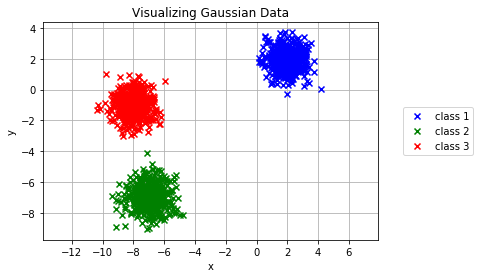

In [107]:
# Write code here:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.linalg import inv
from sklearn.metrics import accuracy_score

def scatter_plot(x_axis, y_axis, x_label, y_label, color, marker, name, title = ''):
    plt.scatter(x_axis, y_axis, c = color, marker = marker ,label = name, zorder = 3)
    plt.xlabel(x_label)
    plt.grid(zorder=0)
    plt.ylabel(y_label)
    if (title != ''):
        plt.title(title)
        
mean_one = np.array([2,2])
mean_two = np.array([-7,-7])
mean_three = np.array([-8,-1])
covariance = np.array([[0.5,0],[0,0.5]])
one = np.random.multivariate_normal(mean_one, covariance, 500)
two = np.random.multivariate_normal(mean_two, covariance, 500)
three = np.random.multivariate_normal(mean_three, covariance, 500)
x_one = [i[0] for i in one]
y_one = [i[1] for i in one]
x_two = [i[0] for i in two]
y_two = [i[1] for i in two]
x_three = [i[0] for i in three]
y_three = [i[1] for i in three]

scatter_plot(x_one, y_one, "x", "y", 'b', 'x', 'class 1',"Visualizing Gaussian Data")
scatter_plot(x_two, y_two, "x", "y", 'g', 'x', 'class 2')
scatter_plot(x_three, y_three, "x", "y", 'r', 'x', 'class 3')
plt.axis('equal')
plt.xticks(np.arange(-12, 7, 2.0))
plt.legend(loc = 'right', bbox_to_anchor=(1.3, 0.5))

b) Randomly split all the data and labels into training and testing sets using an $85\%$/$15\%$  train/test split. 

In [56]:
# Write code here:
one_ext = [[i,1] for i in one]
two_ext = [[i,2] for i in two]
three_ext = [[i,3] for i in three]
all_data = one_ext + two_ext + three_ext
x_train, x_test = train_test_split(all_data, test_size=0.15)

x_train_one = []
x_train_two = []
x_train_three = []
for i in x_train:
    if i[1] == 1:
        x_train_one.append(i[0])
    elif i[1] == 2:
        x_train_two.append(i[0])
    else:
        x_train_three.append(i[0])

c) Obtain the necessary parameter values for ($\widehat{\boldsymbol{\mu}}_y \text{ } \forall \text{ } y$,$\widehat{\Sigma}$,$\widehat{p}(y)$) used for obtaining the LDA decision rule derived in Q$1$.  As a reminder, the preceding values can be obtained as:

$\widehat{p}(y) = \frac{n_y}{n}$,

$\widehat{\boldsymbol{\mu}}_y = \frac{1}{n_y} \sum_{i \in \{ 1,...,n\}: y = y_j} \boldsymbol{x}_i$,

$\widehat{\Sigma} = \frac{1}{n} \sum_{i=1}^n (\boldsymbol{x}_i-\widehat{\boldsymbol{\mu}}_{y_i})(\boldsymbol{x}_i-\widehat{\boldsymbol{\mu}}_{y_i})^T$,

where $n$ is the number of training data points and $n_y$ is the number of occurrences of class $y$ in the training set. 

Please display the resulting values of the preceding variables using print statements.  

In [57]:
# Write code here:
total_num_of_data = 3*len(x_train_one)

p_y = np.zeros((1,3))
p_y[0][0] = len(x_train_one)/total_num_of_data
p_y[0][1] = len(x_train_two)/total_num_of_data
p_y[0][2] = len(x_train_three)/total_num_of_data

mean = np.zeros((3,2))
for i in range(len(x_train_one)):
    mean[0] += x_train_one[i]
for i in range(len(x_train_two)):
    mean[1] += x_train_two[i]
for i in range(len(x_train_three)):
    mean[2] += x_train_three[i]

mean[0] /= len(x_train_one)
mean[1] /= len(x_train_two)
mean[2] /= len(x_train_three)

covariance = np.zeros((2,2))
tmp = np.zeros((2,2))
for i in x_train_one:
    tmp += (i - mean[0])*((i-mean[0]).reshape(1,2).T)
covariance += tmp/total_num_of_data
tmp = np.zeros((2,2))
for i in x_train_two:
    tmp += (i - mean[1])*((i-mean[1]).reshape(1,2).T)
covariance += tmp/total_num_of_data
tmp = np.zeros((2,2))
for i in x_train_three:
    tmp += (i - mean[2])*((i-mean[2]).reshape(1,2).T)
covariance += tmp/total_num_of_data
tmp = np.zeros((2,2))
print("p:\n", p_y)
print("Empirical means:\n", mean)
print("Covariance matrix:\n",covariance)

p:
 [[0.33333333 0.33490566 0.3341195 ]]
Empirical means:
 [[ 2.04253173  2.00203957]
 [-6.94899332 -7.01476511]
 [-7.98771679 -0.97571579]]
Covariance matrix:
 [[ 0.51207669 -0.02053594]
 [-0.02053594  0.48203662]]


d) Since we know ($\widehat{\boldsymbol{\mu}}_y \text{ } \forall \text{ } y$,$\widehat{\Sigma}$,$\widehat{p}(y)$), we can in turn obtain the LDA decision rule. Let:

$\boldsymbol{\beta}_y = \Sigma^{-1} \boldsymbol{\mu}_y $,

$\alpha_y = - \frac{1}{2} \boldsymbol{\mu}_y^T \Sigma^{-1} \boldsymbol{\mu}_y + \text{log}(p(y))$;

with this, the LDA decision rule can be re-expressed as:

$h_{LDA} (\boldsymbol{x}) = \text{argmax}_y \text{ } \boldsymbol{\beta}_y^T \boldsymbol{x} + \alpha_y$.  

The objective function in the preceding equation basically projects $\boldsymbol{x}$ into $1$ dimension and offsets it.  

Obtain and display the values of $\boldsymbol{\beta}_y \forall y$ and $\alpha_y \forall y$ using print statements.

In [58]:
# Write code here:
beta = np.zeros((3,2))
alpha = np.zeros((3,1))

inv_covariance = inv(covariance)
for i in range(3):
    beta[i] = inv_covariance @ mean[i]
print("Beta:\n",beta)

for i in range(3):
    alpha[i] = -1/2* mean[i] @ inv_covariance @ mean[i] + np.log(p_y[0][i])
print("alpha:\n",alpha)print(all_data)

Beta:
 [[  4.16239432   4.33062172]
 [-14.17803951 -15.15636822]
 [-15.70668273  -2.69329598]]
alpha:
 [[  -9.68456154]
 [-103.51463884]
 [ -65.14046893]]


e) Using the derived LDA decision rule, obtain and display the Correct Classification Rates (CCR) for the training and testing sets. Also, explain the resulting CCRs.

In [80]:
 # Write code here:
y_pred_train = [0]*len(x_train)
y_pred_test = [0]*len(x_test)
y_ground_truth_train = [i[1] for i in x_train]
y_ground_truth_test = [i[1] for i in x_test]
# print(beta[0] @ x_train[0][0] + alpha[0])

for i in range(len(x_train)):
    class_pred = 0
    tmp_max = -10000
    for j in range(3):
        value = beta[j] @ x_train[i][0] + alpha[j]
        if ( value > tmp_max ):
            tmp_max = value
            class_pred = (j+1)
    y_pred_train[i] = class_pred

for i in range(len(x_test)):
    class_pred = 0
    tmp_max = -10000
    for j in range(3):
        value = beta[j] @ x_test[i][0] + alpha[j]
        if ( value > tmp_max ):
            tmp_max = value
            class_pred = (j+1)
    y_pred_test[i] = class_pred

train_ccr = accuracy_score(y_ground_truth_train, y_pred_train)
test_ccr = accuracy_score(y_ground_truth_test, y_pred_test)

print("LDA - Train CCR:",train_ccr)
print("LDA - Test CCR:",test_ccr)

LDA - Train CCR: 1.0
LDA - Test CCR: 1.0


f) Here, we will test our LDA classifier on $5$ new data points:
    
$\boldsymbol{x}_1 = [10,10]^T,\boldsymbol{x}_2 = [-10,10]^T,\boldsymbol{x}_3 = [-10,-10]^T,\boldsymbol{x}_4 = [10,-10]^T,\boldsymbol{x}_5 = [0,0]^T$

Plot these new test points along with the original Gaussian data on a new figure. For each new test point, compute the score of the test point belonging to class $y \text{ } \forall \text{ } y \in \{1,...,m \}$ as:  $\text{score}_y = \boldsymbol{\beta}_y^T \boldsymbol{x} + \alpha_y$ and display the scores using print statements.  

Describe the resulting scores and rationalize why they make sense based on proximity of a new test point to a certain data cluster.   

[[ 10  10]
 [-10  10]
 [-10 -10]
 [ 10 -10]
 [  0   0]]
[[  75.24559884 -396.8587162  -249.14025605]
 [  -8.00228752 -113.29792595   64.99339854]
 [ -94.61472192  189.82943851  118.85931818]
 [ -11.36683556  -93.73135174 -195.27433641]
 [  -9.68456154 -103.51463884  -65.14046893]]


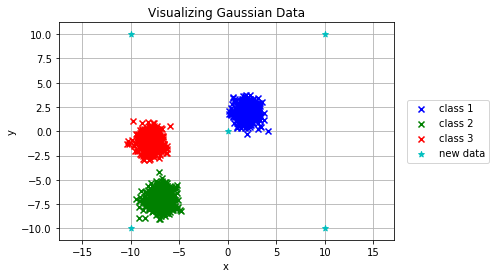

In [109]:
# Write code here:
new_data = np.array([[10,10],[-10,10],[-10,-10],[10,-10],[0,0]])
scatter_plot(x_one, y_one, "x", "y", 'b', 'x', 'class 1',"Visualizing Gaussian Data")
scatter_plot(x_two, y_two, "x", "y", 'g', 'x', 'class 2')
scatter_plot(x_three, y_three, "x", "y", 'r', 'x', 'class 3')
plt.axis('equal')

new_data_x = [i[0] for i in new_data]
new_data_y = [i[1] for i in new_data]
scatter_plot(new_data_x, new_data_y, "x", "y", 'c', '*', 'new data')
plt.legend(loc = 'right', bbox_to_anchor=(1.3, 0.5))

scores = np.zeros((5,3))

for i in range(len(new_data)):
    for j in range(3):
        scores[i][j] = beta[j] @ new_data[i] + alpha[j]

print(new_data)
print(scores)

**3) Logistic Regression**

In this problem, we will implement Logistic Regression using the built in capability (from sklearn).

Form a Logistic Regression classifer using the training data from Q$2$ and apply it to the training and testing sets from Q$2$. Obtain the CCRs for the training and testing sets; also, explain the resulting CCRs. 

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')

lr_x_train = [i[0] for i in x_train]
lr_y_train = [i[1] for i in x_train]
clf.fit(lr_x_train, lr_y_train)

lr_x_test = [i[0] for i in x_test]
lr_y_test = [i[1] for i in x_test]

lr_y_pred_train = clf.predict(lr_x_train)
lr_y_pred_test = clf.predict(lr_x_test)

lr_train_ccr = accuracy_score(y_ground_truth_train, lr_y_pred_train)
lr_test_ccr = accuracy_score(lr_y_test, lr_y_pred_test)

print("LR - Train CCR:", lr_train_ccr)
print("LR - Test CCR:", lr_test_ccr)

LR - Train CCR: 1.0
LR - Test CCR: 1.0
